In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
import os, sys
import re
from datetime import datetime

In [2]:
%ls

 磁碟區 C 中的磁碟是 Acer
 磁碟區序號:  8159-6850

 C:\Users\鐸\Documents\monitor record\makePic 的目錄

2018/11/02  下午 02:56    <DIR>          .
2018/11/02  下午 02:56    <DIR>          ..
2018/11/02  下午 02:23    <DIR>          .ipynb_checkpoints
2018/11/02  下午 02:47            15,128 201810031615.png
2018/11/02  下午 02:47            15,880 201810050513.png
2018/11/02  下午 02:47            15,055 201810060923.png
2018/10/04  上午 11:37           310,711 703007_BO-TK-P10+TS-P10_201810031615.CSV
2018/10/06  上午 02:15           319,655 703007_BO-TK-P10+TS-P10_201810050513.CSV
2018/10/07  上午 04:44           305,165 703007_BO-TK-P10+TS-P10_201810060923.CSV
2018/10/09  下午 04:58           308,020 703007_BO-TK-P10+TS-P10_201810082137.CSV
2018/10/10  下午 11:44           305,230 703007_BO-TK-P10+TS-P10_201810100423.CSV
2018/10/12  上午 08:55           308,500 703007_BO-TK-P10+TS-P10_201810111333.CSV
2018/10/13  下午 04:04           308,777 703007_BO-TK-P10+TS-P10_201810122042.CSV
2018/10/14  下午 10:23           306,637 7030

In [3]:
#檔名統一改大寫

files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    if f == 'BO_BC_PROFILEPLOT IN A ROW.ipynb': #遇到此檔案不改檔名
        print(f)
    else:
        newfile = f.upper()
        os.rename(f,newfile)
        print(f)

201810031615.png
201810050513.png
201810060923.png
703007_BO-TK-P10+TS-P10_201810031615.CSV
703007_BO-TK-P10+TS-P10_201810050513.CSV
703007_BO-TK-P10+TS-P10_201810060923.CSV
703007_BO-TK-P10+TS-P10_201810082137.CSV
703007_BO-TK-P10+TS-P10_201810100423.CSV
703007_BO-TK-P10+TS-P10_201810111333.CSV
703007_BO-TK-P10+TS-P10_201810122042.CSV
703007_BO-TK-P10+TS-P10_201810140302.CSV
703007_BO-TK-P10+TS-P10_201810151004.CSV
703007_BO-TK-P10+TS-P10_201810161822.CSV
703007_BO-TK-P10+TS-P10_201810180317.CSV
703007_BO-TK-P10+TS-P10_201810191015.CSV
703007_BO-TK-P10+TS-P10_201810240903.CSV
703007_BO-TK-P10+TS-P10_201810262101.CSV
703007_BO-TK-P10+TS-P10_201810280318.CSV
703007_BO-TK-P10+TS-P10_201810301427.CSV
703007_BO-TK-P17_201810020443.CSV
703007_BO-TK-P17_201810201716.CSV
703007_BO-TK-P17_201810212108.CSV
BO_BC_PROFILEPLOT IN A ROW.ipynb


In [4]:
path = os.getcwd()    #获取当前路径
count = 0
for root,dirs,files in os.walk(path):    #遍历统计
      for each in files:
             count += 1   #统计文件夹下文件个数
print(count)               #输出结果

import glob

targetPattern = r"*.CSV"
csv_file = glob.glob(targetPattern)
csv_file.sort()
csv_file

24


['703007_BO-TK-P10+TS-P10_201810031615.CSV',
 '703007_BO-TK-P10+TS-P10_201810050513.CSV',
 '703007_BO-TK-P10+TS-P10_201810060923.CSV',
 '703007_BO-TK-P10+TS-P10_201810082137.CSV',
 '703007_BO-TK-P10+TS-P10_201810100423.CSV',
 '703007_BO-TK-P10+TS-P10_201810111333.CSV',
 '703007_BO-TK-P10+TS-P10_201810122042.CSV',
 '703007_BO-TK-P10+TS-P10_201810140302.CSV',
 '703007_BO-TK-P10+TS-P10_201810151004.CSV',
 '703007_BO-TK-P10+TS-P10_201810161822.CSV',
 '703007_BO-TK-P10+TS-P10_201810180317.CSV',
 '703007_BO-TK-P10+TS-P10_201810191015.CSV',
 '703007_BO-TK-P10+TS-P10_201810240903.CSV',
 '703007_BO-TK-P10+TS-P10_201810262101.CSV',
 '703007_BO-TK-P10+TS-P10_201810280318.CSV',
 '703007_BO-TK-P10+TS-P10_201810301427.CSV',
 '703007_BO-TK-P17_201810020443.CSV',
 '703007_BO-TK-P17_201810201716.CSV',
 '703007_BO-TK-P17_201810212108.CSV']

In [5]:
list_mcdate=[]
mcdate=list_mcdate
for i in range(count-2): #count = 總檔案數-1(ipynb檔)
    
    y = csv_file[i:i+1]  #取出檔名
    filename = str(''.join(y)) #將檔名轉為string
    path = os.getcwd()+ '/' + filename # os.getcwd取得路徑名稱+檔案名稱


In [6]:
for i in range(count-1): #count = 總檔案數-1(ipynb檔)
    y = csv_file[i:i+1]  #取出檔名
    filename = str(''.join(y)) #將檔名轉為string
    path = os.getcwd()+ '/' + filename # os.getcwd取得路徑名稱+檔案名稱
    df = pd.read_csv(path, engine='python') #讀CSV檔

    print(path)

C:\Users\鐸\Documents\monitor record\makePic/703007_BO-TK-P10+TS-P10_201810031615.CSV
C:\Users\鐸\Documents\monitor record\makePic/703007_BO-TK-P10+TS-P10_201810050513.CSV
C:\Users\鐸\Documents\monitor record\makePic/703007_BO-TK-P10+TS-P10_201810060923.CSV
C:\Users\鐸\Documents\monitor record\makePic/703007_BO-TK-P10+TS-P10_201810082137.CSV
C:\Users\鐸\Documents\monitor record\makePic/703007_BO-TK-P10+TS-P10_201810100423.CSV
C:\Users\鐸\Documents\monitor record\makePic/703007_BO-TK-P10+TS-P10_201810111333.CSV
C:\Users\鐸\Documents\monitor record\makePic/703007_BO-TK-P10+TS-P10_201810122042.CSV
C:\Users\鐸\Documents\monitor record\makePic/703007_BO-TK-P10+TS-P10_201810140302.CSV
C:\Users\鐸\Documents\monitor record\makePic/703007_BO-TK-P10+TS-P10_201810151004.CSV
C:\Users\鐸\Documents\monitor record\makePic/703007_BO-TK-P10+TS-P10_201810161822.CSV
C:\Users\鐸\Documents\monitor record\makePic/703007_BO-TK-P10+TS-P10_201810180317.CSV
C:\Users\鐸\Documents\monitor record\makePic/703007_BO-TK-P10+TS-P

ParserError: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead

df.columns = ['time','temp1','temp2','temp3','temp_LSL','temp_USL','o2_mv','o2_mv_LSL',
              'o2_mv_USL','H2_content','pressure','H2_flow_L','N2_flow','H2_flow_cc',
              'H2_content_LSL','H2_content_USL',
              'pressure_LSL','pressure_USL',
              'H2_flow_L_LSL','H2_flow_L_USL',
              'N2_flow_LSL','N2_flow_USL',
              'H2_flow_cc_LSL','H2_flow_cc_USL',
                ]
df.head()

len(df)


df['time'] = range(len(df))
df.head()

x = np.array(df.time)
y1 = np.array(df.temp1)
y2 = np.array(df.o2_mv)
y3 = np.array(df.pressure)
y4 = np.array(df.H2_content)
y5 = np.array(df.N2_flow)
y6 = np.array(df.H2_flow_L)

fig = plt.figure(figsize=(4,2))

ax1 = fig.add_subplot(111)
ax1.plot(x,y1,"-",label="$Temp$", c = "black" ) #label = 曲線名稱
ax1.grid(True, linestyle='-.')
plt.plot(x[y1>900], y1[y1>900], 'orange', lw=3) #取出<80的值,以red顯示

plt.legend(loc = 1)#顯示曲線標號

ax2 = ax1.twinx()  # this is the important function
ax2.plot(x,y2,"-",label="$O2 mv$", c = "blue", lw=1)
plt.plot(x[y2<80], y2[y2<80], 'red', lw=3) #取出<80的值,以red顯示

plt.xlabel('time')

plt.legend(loc = 4)#顯示曲線標號

ax1.set_ylabel('temp (C)')
ax1.set_xlabel('time (min)')
ax1.set_title(filename)
ax2.set_ylabel('oxygen content (mv)')

#plt.gca().add_artist(ax1)
plt.show()


#other plot
x = np.array(df.time)
y3 = np.array(df.pressure)
y4 = np.array(df.H2_content)
y5 = np.array(df.N2_flow)
y6 = np.array(df.H2_flow_L)

fig = plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
plt.plot([0, 1], [0, 1])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3) 

plt.plot(x,y3,"--",label='Pressure', c = "black")
plt.grid(True, linestyle='-.')
plt.xlabel('time(min)')
plt.title(filename + "Pressure")
plt.legend(loc = 'best')#顯示曲線標號

plt.subplot(2, 2, 2)
plt.plot([0, 1], [0, 1])
ax4 = plt.plot(x,y4,"--o",label='H2', c = "blue")
plt.grid(True, linestyle='-.')

plt.xlabel('time(min)')
plt.title(filename + "H2 content")
plt.legend(loc = 'best')#顯示曲線標號

plt.subplot(2, 2, 3)
plt.plot([0, 1], [0, 1])

plt.plot(x,y6,"--",label='H2_SLM', c = "aqua")
plt.grid(True, linestyle='-.')
plt.xlabel('time(min)')
plt.title(filename + "H2 gas flow")
plt.legend(loc = 1)#顯示曲線標號





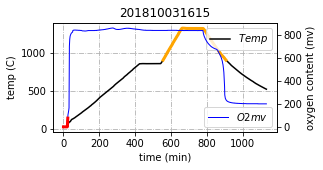

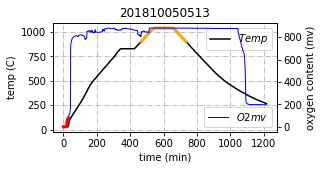

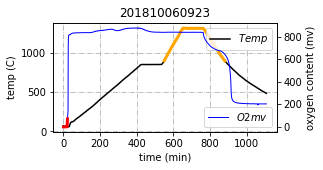

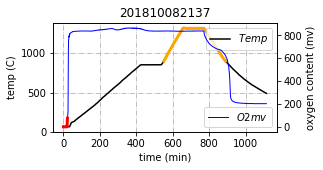

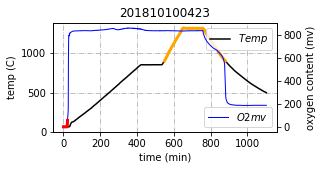

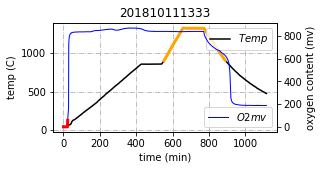

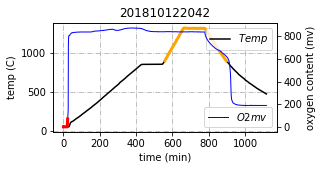

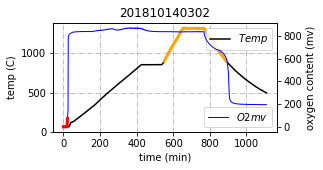

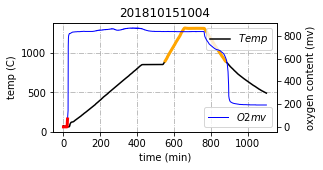

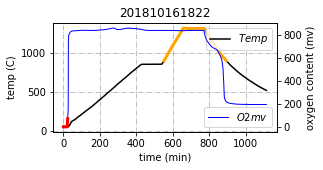

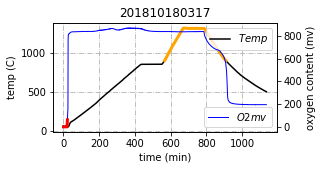

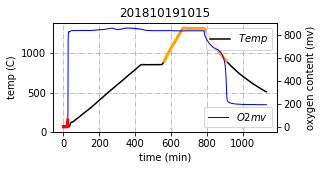

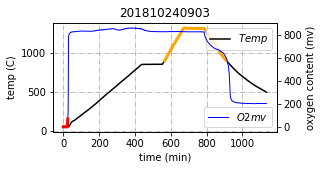

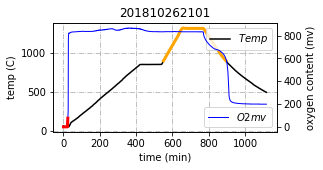

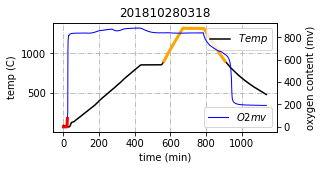

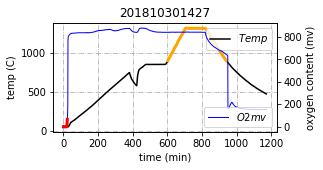

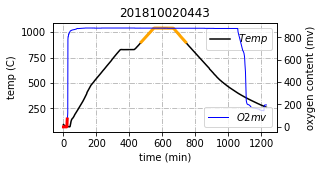

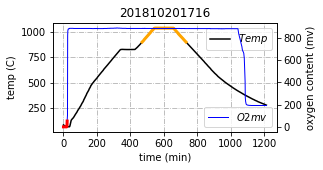

ParserError: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead

In [8]:

for i in range(count-2): #count = 總檔案數-1(ipynb檔)
    y = csv_file[i:i+1]  #取出檔名
    filename = str(''.join(y)) #將檔名轉為string
    path = os.getcwd()+ '/' + filename # os.getcwd取得路徑名稱+檔案名稱
    df = pd.read_csv(path, engine='python') #讀CSV檔
    
    df.columns = ['time','temp1','temp2','temp3','temp_LSL','temp_USL','o2_mv','o2_mv_LSL',
              'o2_mv_USL','H2_content','pressure','H2_flow_L','N2_flow','H2_flow_cc',
               'H2_content_LSL','H2_content_USL',
              'pressure_LSL','pressure_USL',
              'H2_flow_L_LSL','H2_flow_L_USL',
              'N2_flow_LSL','N2_flow_USL',
              'H2_flow_cc_LSL','H2_flow_cc_USL',
            
                ]
           
    df['time'] = range(len(df))
    
    x = np.array(df.time)
    y1 = np.array(df.temp1)
    y2 = np.array(df.o2_mv)
    y3 = np.array(df.pressure)
    y4 = np.array(df.H2_content)
    y5 = np.array(df.N2_flow)
    y6 = np.array(df.H2_flow_L)

    fig = plt.figure(figsize=(4,2))
    ax1 = fig.add_subplot(111)
       
    ax1.plot(x,y1,"-",label="$Temp$", c = "black" ) #label = 曲線名稱
    ax1.grid(True, linestyle='-.')
    plt.plot(x[y1>900], y1[y1>900], 'orange', lw=3) #取出<80的值,以red顯示
    plt.legend(loc = 1)#顯示曲線標號

    ax2 = ax1.twinx()  # this is the important function
    ax2.plot(x,y2,"-",label="$O2 mv$", c = "blue", lw=1)
    plt.plot(x[y2<80], y2[y2<80], 'red', lw=3) #取出<80的值,以red顯示
    plt.xlabel('time')
    plt.legend(loc = 4)#顯示曲線標號

    ax1.set_ylabel('temp (C)')
    ax1.set_xlabel('time (min)')
    
    DateRegex = re.compile(r'\d\d\d\d\d\d\d\d\d\d\d\d')
    mo = DateRegex.search(filename)
    filedate = mo.group()
    
    ax1.set_title(filedate)
    #ax1.set_title(filename.split('.')[0][0:25])
    ax2.set_ylabel('oxygen content (mv)')
    
    plt.savefig(filedate)
    plt.show()
